C:\Users\jonre\anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\jonre\anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:331: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
C:\Users\jonre\anaconda3\lib\site-packages\cartopy\mpl\style.py:90: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


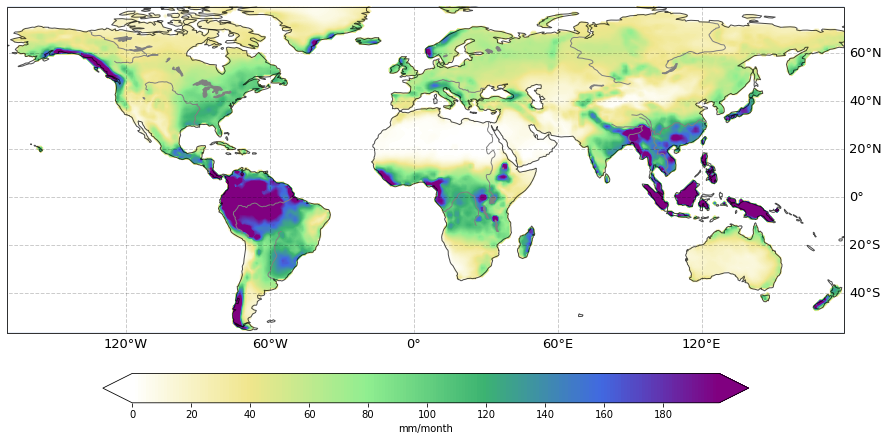

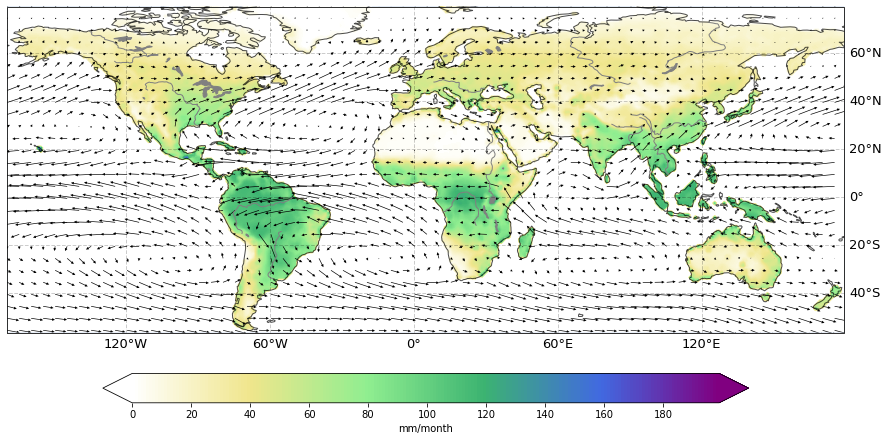

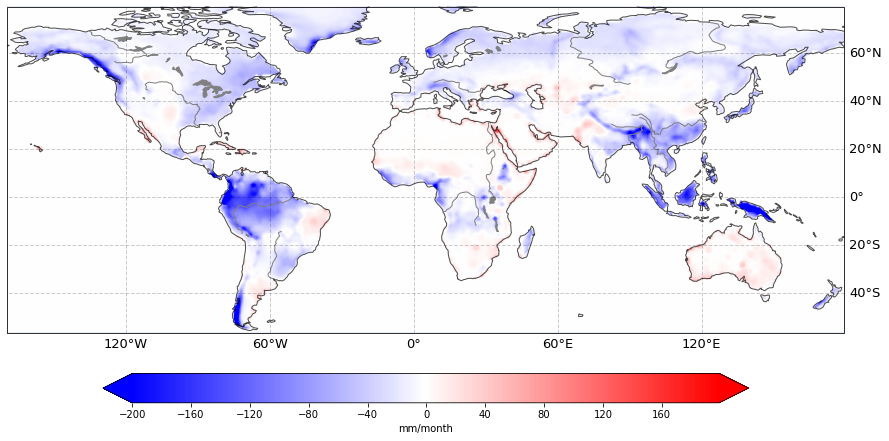

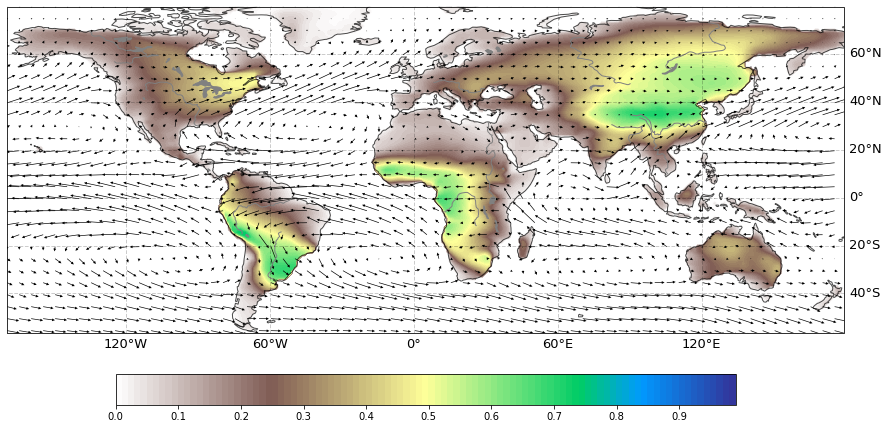

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
from matplotlib.colors import ListedColormap,LinearSegmentedColormap,Normalize
from mpl_toolkits.axes_grid1 import make_axes_locatable
import math

#MEDIA DE UN MES EN UNOS AÑOS
carpeta='MUNDO'
zona='MUNDO'
mes='2015-2019'
princ=0
final=60

lon=np.loadtxt('C:/Users/jonre/TFG/%s/lon_%s.txt'%(carpeta,zona))
lat=np.loadtxt('C:/Users/jonre/TFG/%s/lat_%s.txt'%(carpeta,zona))
lon2=np.loadtxt('C:/Users/jonre/TFG/%s/lon2_%s.txt'%(carpeta,zona))
lat2=np.loadtxt('C:/Users/jonre/TFG/%s/lat2_%s.txt'%(carpeta,zona))

Eflow=np.zeros((len(lat2),len(lon2)))
Eflow_mm=np.zeros((len(lat2),len(lon2)))
P=np.zeros((len(lat2),len(lon2)))
EvapPrec=np.zeros((len(lat2),len(lon2)))
Qx=np.zeros((len(lat),len(lon)))
Qy=np.zeros((len(lat),len(lon)))
rho=np.zeros((len(lat2),len(lon2)))    
Qx2 = np.zeros((len(lat2),len(lon2)))   
Qy2 = np.zeros((len(lat2),len(lon2)))

#enero:0,12...
#febrero:1,13...
#marzo:2,14...
#abril:3,15...
#mayo:4,16...
#junio:5,17...
#julio:6,18...
#agosto:7,19...
#septiembre:8,20...
#octubre:9,21...
#Noviembre:10,22...
#Diciembre:11,23...

k=0
Eflow_fecha=np.zeros((len(lat2),len(lon2)))
Eflow_mm_fecha=np.zeros((len(lat2),len(lon2)))
Precipitacion_fecha=np.zeros((len(lat2),len(lon2)))
Evap_Precip_fecha=np.zeros((len(lat2),len(lon2)))
Qx_fecha=np.zeros((len(lat),len(lon)))
Qy_fecha=np.zeros((len(lat),len(lon)))
rho_fecha=np.zeros((len(lat2),len(lon2)))
Qx2_fecha=np.zeros((len(lat2),len(lon2)))
Qy2_fecha=np.zeros((len(lat2),len(lon2)))


for t in range(princ,final):
    Eflow=np.loadtxt('C:/Users/jonre/TFG/%s/Eflow_%s_%d.txt'%(carpeta,zona,t))
    Eflow_mm=np.loadtxt('C:/Users/jonre/TFG/%s/Eflow_mm_%s_%d.txt'%(carpeta,zona,t))
    P=np.loadtxt('C:/Users/jonre/TFG/%s/P_mm_%s_%d.txt'%(carpeta,zona,t))
    EvapPrec=np.loadtxt('C:/Users/jonre/TFG/%s/Evap_Precip_%s_%d.txt'%(carpeta,zona,t))
    Qx=np.loadtxt('C:/Users/jonre/TFG/%s/Qx_%s_%d.txt'%(carpeta,zona,t))
    Qy=np.loadtxt('C:/Users/jonre/TFG/%s/Qy_%s_%d.txt'%(carpeta,zona,t))
    rho=np.loadtxt('C:/Users/jonre/TFG/%s/rho_%s_%d.txt'%(carpeta,zona,t))

    for y in range(0,len(lat2),5): 
        for x in range(0,len(lon2),5):
                    Qx2[y,x]=(Qx[y,x]+Qx[y+1,x]+Qx[y,x+1]+Qx[y+1,x+1])/4
                    Qy2[y,x]=(Qy[y,x]+Qy[y+1,x]+Qy[y,x+1]+Qy[y+1,x+1])/4
                    lat3=lat2[y]
                    lon3 =lon2[x]
    k=k+1
    
    Eflow_fecha=Eflow_fecha+Eflow
    Eflow_mm_fecha=Eflow_mm_fecha+Eflow_mm
    Precipitacion_fecha=Precipitacion_fecha+P
    Evap_Precip_fecha=Evap_Precip_fecha+EvapPrec
    Qx_fecha=Qx_fecha+Qx
    Qy_fecha=Qy_fecha+Qy
    rho_fecha=rho_fecha+rho
    Qx2_fecha=Qx2_fecha+Qx2
    Qy2_fecha=Qy2_fecha+Qy2
    
Eflow_fecha=Eflow_fecha/k
Eflow_mm_fecha=Eflow_mm_fecha/k
Precipitacion_fecha=Precipitacion_fecha/k
Evap_Precip_fecha=Evap_Precip_fecha/k
Qx_fecha=Qx_fecha/k
Qy_fecha=Qy_fecha/k
rho_fecha=rho_fecha/k
Qx2_fecha=Qx2_fecha/k
Qy2_fecha=Qy2_fecha/k


np.savetxt('C:/Users/jonre/TFG/%s/media_Eflow_%s_%s.txt'%(carpeta,zona,mes), Eflow_fecha)
np.savetxt('C:/Users/jonre/TFG/%s/media_Eflow_mm_%s_%s.txt'%(carpeta,zona,mes), Eflow_mm_fecha)
np.savetxt('C:/Users/jonre/TFG/%s/media_P_mm_%s_%s.txt'%(carpeta,zona,mes), Precipitacion_fecha)
np.savetxt('C:/Users/jonre/TFG/%s/media_Qx_%s_%s.txt'%(carpeta,zona,mes), Qx_fecha)
np.savetxt('C:/Users/jonre/TFG/%s/media_Qy_%s_%s.txt'%(carpeta,zona,mes), Qy_fecha)
np.savetxt('C:/Users/jonre/TFG/%s/media_Evap_Precip_mm_%s_%sd.txt'%(carpeta,zona,mes),Evap_Precip_fecha)
np.savetxt('C:/Users/jonre/TFG/%s/rho_%s_%sd.txt'%(carpeta,zona,mes),rho_fecha)

#PRECIPITACION---------------------

fig1= plt.figure('Precipitación', figsize=(15,15))
fig1.subplots_adjust(hspace=0.5, wspace=0.5)
    
    #azul=LinearSegmentedColormap.from_list('mycmap', ['white', 'blue'])
#azul=plt.get_cmap('terrain_r')
azul= LinearSegmentedColormap.from_list('mycmap', ['white','khaki','lightgreen','mediumseagreen','royalblue','purple'])

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(color='k', alpha=0.7)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature. RIVERS, color='gray')
ax.add_feature(cartopy.feature.LAKES, color='gray')


#levels1=np.array(range(0,int(np.amax(P)),1))
levels1=np.array(range(0,200,1))
precipitacion=plt.contourf(lon2, lat2, Precipitacion_fecha, levels1, transform=ccrs.PlateCarree(),cmap=azul, extend='both')
colorbar1=plt.colorbar(precipitacion,fraction=0.036, orientation="horizontal", pad=0.05, label='mm/month')


gl=ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='k', alpha=0.2, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = False
gl.xlabel_style = {'size': 13}
gl.ylabel_style = {'size': 13}

#plt.show()
plt.savefig("C:/Users/jonre/TFG/graficas para el tfg/precipitation_%s_%s.jpg"%(zona,mes), bbox_inches='tight') 
#EVAPORACION------------------------

fig2= plt.figure('Evaporación', figsize=(15,15))
fig2.subplots_adjust(hspace=0.5, wspace=0.5)
#rojo = LinearSegmentedColormap.from_list('mycmap', ['white', 'red'])
rojo=plt.get_cmap('terrain_r')
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(color='k', alpha=0.7)


ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature. RIVERS, color='gray')
ax.add_feature(cartopy.feature.LAKES, color='gray')

#levels2=np.array(range(0,int(np.amax(Eflow_mm)),1))
Evaporacion=plt.contourf(lon2, lat2, Eflow_mm_fecha, levels1, transform=ccrs.PlateCarree(),cmap=azul ,extend='both')
colorbar2=plt.colorbar(Evaporacion,fraction=0.036, orientation="horizontal", pad=0.05,label='mm/month' )
#quiv=plt.quiver(lon2, lat2, Qx2_fecha, Qy2_fecha,  scale_units='inches',scale=900.0, width=0.0008, headwidth=4, headlength=4, minlength=0.00001)
quiv2=plt.quiver(lon2, lat2, Qx2_fecha, Qy2_fecha,  scale_units='inches',scale=900.0, width=0.0008, headwidth=4, headlength=4, minlength=0.00001)
gl=ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='k', alpha=0.2, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = False
gl.xlabel_style = {'size': 13}
gl.ylabel_style = {'size': 13}

#plt.show()
plt.savefig("C:/Users/jonre/TFG/graficas para el tfg/evaporacion_%s_%s.jpg"%(zona,mes), bbox_inches='tight') 
#EVAPORACION-PRECIPITCION----------------


fig3= plt.figure('Evaporación-Precipitación', figsize=(15,15))
fig3.subplots_adjust(hspace=0.5, wspace=0.5)
azulrojo= LinearSegmentedColormap.from_list('mycmap', ['blue','white', 'red'])

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(color='k', alpha=0.7)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature. RIVERS, color='gray')
ax.add_feature(cartopy.feature.LAKES, color='gray')

levels3=np.array(range(-200,200,1))
EvaPrecip=plt.contourf(lon2, lat2, Evap_Precip_fecha,levels3, transform=ccrs.PlateCarree(),cmap=azulrojo, extend='both', )
colorbar2=plt.colorbar(EvaPrecip,fraction=0.036, orientation="horizontal", pad=0.05, label='mm/month' )

#quiv=plt.quiver(lon2, lat2, Qx2, Qy2, scale=1100, scale_units='inches', width=0.004, headwidth=3, headlength=5, minlength=0.00001)

gl=ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='k', alpha=0.2, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = False
gl.xlabel_style = {'size': 13}
gl.ylabel_style = {'size': 13}

#plt.show()
plt.savefig("C:/Users/jonre/TFG/graficas para el tfg/evaporacion-precipitacion_%s_%s.jpg"%(zona,mes), bbox_inches='tight')   

#RHO-----------

                    
#---------------------------GRAFICAR MAPA------------------                    
fig4 = plt.figure(figsize=(15,15))
fig4.subplots_adjust(hspace=0.5, wspace=0.5)
ax = plt.axes(projection=ccrs.PlateCarree())
#---COLORES MAPA---
colores = plt.get_cmap('terrain_r')
#----CONTOURF=RHO-----
levels=np.array(range(0,100,1))
levels=levels/100
contourf=plt.contourf(lon2, lat2, rho_fecha, levels, transform=ccrs.PlateCarree(),cmap=colores)
colorbar=plt.colorbar(contourf,fraction=0.038, orientation="horizontal", pad=0.05)
#---FLUJO-----
#para eurasia y africa-0.0022
#quiv=plt.quiver(lon2, lat2, Qx2_fecha, Qy2_fecha,  scale_units='inches',scale=800.0, width=0.0018, headwidth=4, headlength=4, minlength=0.00001)
#para regiones
quiv2=plt.quiver(lon2, lat2, Qx2_fecha, Qy2_fecha,  scale_units='inches',scale=900.0, width=0.0008, headwidth=4, headlength=4, minlength=0.00001)

ax.coastlines(color='k', alpha=0.7)
#ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature. RIVERS, color='gray')
ax.add_feature(cartopy.feature.LAKES, color='gray')



gl=ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='k', alpha=0.2, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = False
gl.xlabel_style = {'size': 13}
gl.ylabel_style = {'size': 13}

#plt.show()
plt.savefig("C:/Users/jonre/TFG/graficas para el tfg/rho_%s_%s.jpg"%(zona,mes), bbox_inches='tight') 